In [ ]:
# !unzip data.zip

Archive:  data.zip
  inflating: drug200.csv             


In [2]:
"""
# AI 기반 적합한 약품 추천 모델 개발

## 1. 라이브러리 임포트 및 환경 설정

필요한 라이브러리를 불러오고, 시각화를 위한 기본적인 스타일을 설정합니다.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 시각화 스타일 설정
plt.style.use('fivethirtyeight')

In [4]:
"""
## 2. 데이터 로드

분석에 사용할 `drug200.csv` 데이터셋을 불러옵니다.
"""

# 데이터셋 로드
df = pd.read_csv('./drug200.csv')

In [6]:
"""
## 3. 탐색적 데이터 분석 (EDA)

데이터의 구조와 특징을 파악하기 위해 기본적인 정보와 분포를 시각적으로 탐색합니다.

### 3-1. 데이터 기본 정보 확인
"""

# 데이터의 처음 5개 행 확인
print("--- 데이터 샘플 ---")
print(df.head())

--- 데이터 샘플 ---
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [7]:
# 데이터프레임의 요약 정보 확인
print("\n--- 데이터 정보 ---")
df.info()


--- 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
# 수치형 데이터의 기술 통계량 확인
print("\n--- 기술 통계량 ---")
print(df.describe())


--- 기술 통계량 ---
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


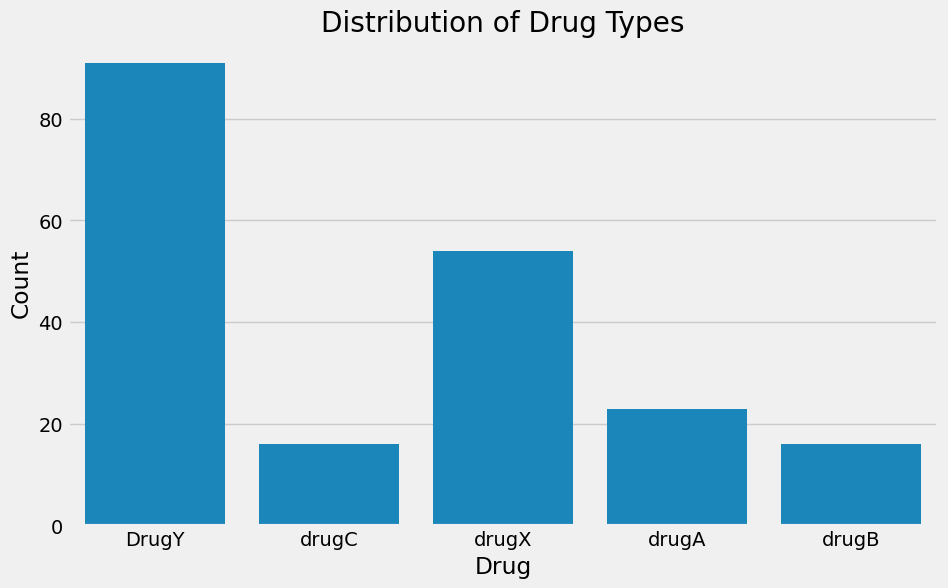

In [9]:
"""### 3-2. 데이터 분포 시각화"""

# 타겟 변수인 'Drug' 열의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Types')
plt.ylabel('Count')
plt.show()


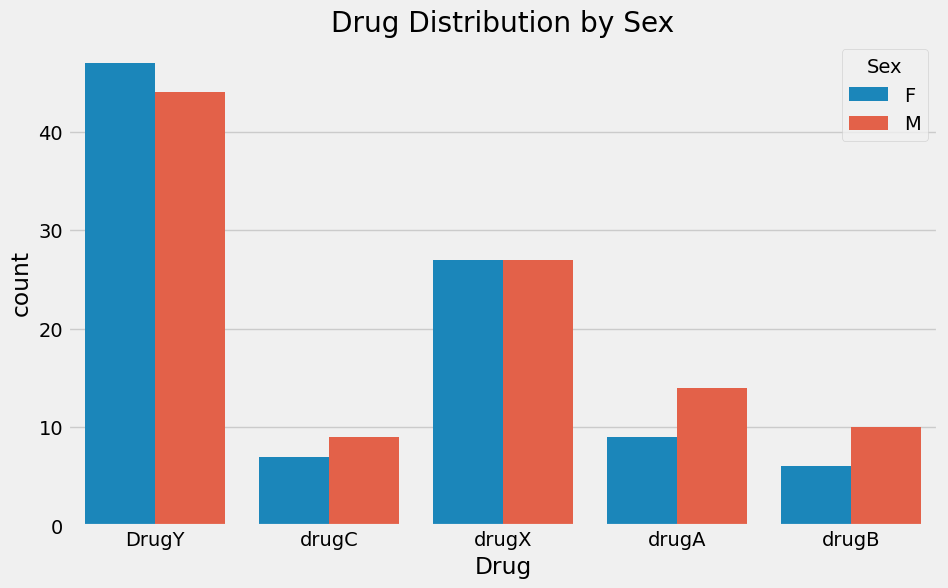

In [10]:
# '성별(Sex)'에 따른 약물 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', hue='Sex', data=df)
plt.title('Drug Distribution by Sex')
plt.show()

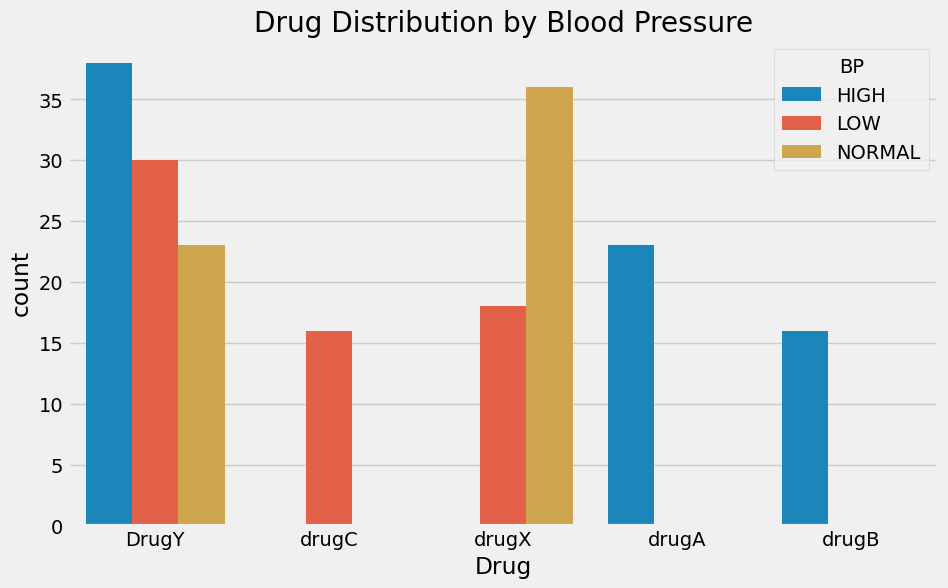

In [11]:
# '혈압(BP)'에 따른 약물 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', hue='BP', data=df)
plt.title('Drug Distribution by Blood Pressure')
plt.show()

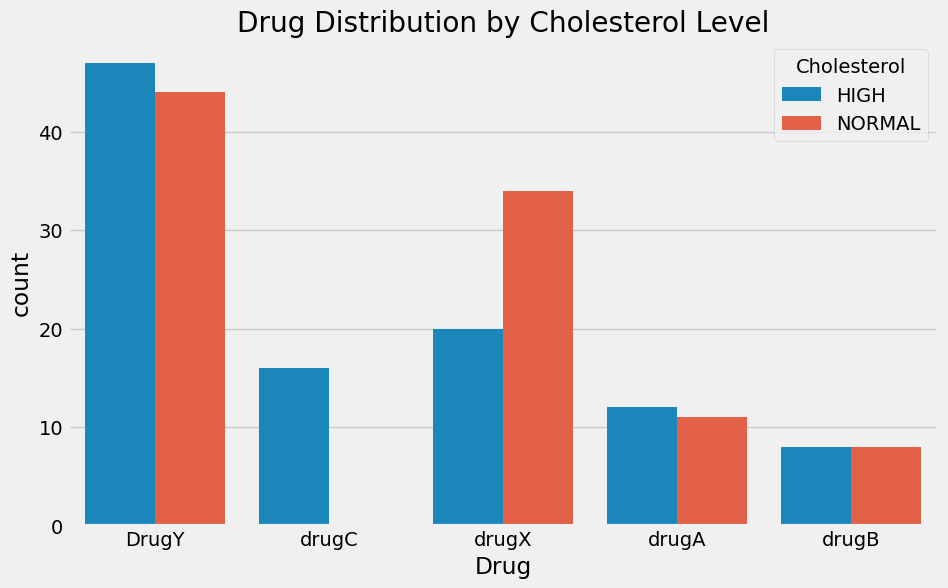

In [12]:
# '콜레스테롤(Cholesterol)'에 따른 약물 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', hue='Cholesterol', data=df)
plt.title('Drug Distribution by Cholesterol Level')
plt.show()

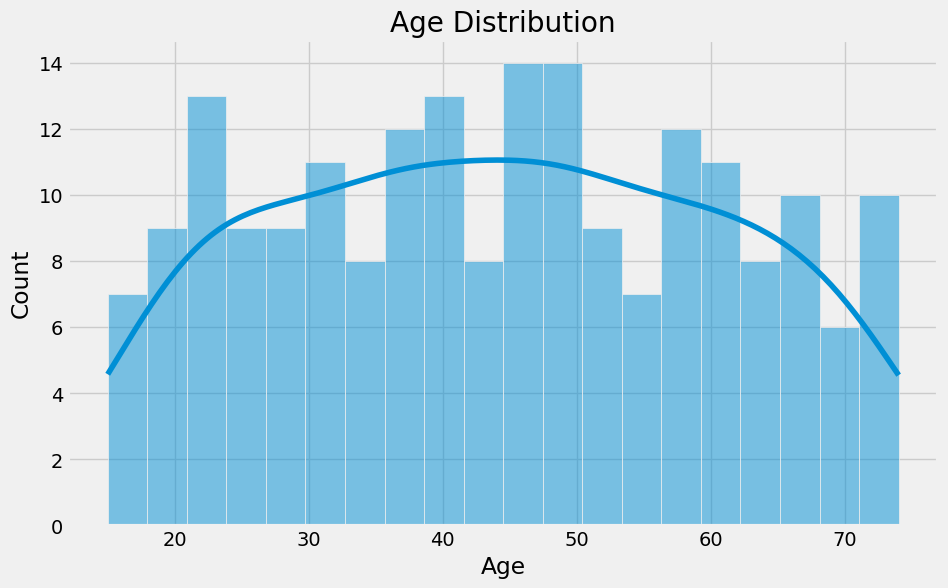

In [13]:
# '나이(Age)' 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

In [14]:
"""
## 4. 데이터 전처리

모델 학습에 적합한 형태로 데이터를 가공합니다. 범주형 변수는 수치형으로 변환하고, 수치형 변수는 스케일링을 진행합니다.

### 4-1. 피처(X)와 타겟(Y) 분리
"""

# 피처와 타겟 변수 분리
X = df.drop('Drug', axis=1)
y = df['Drug']

In [15]:
"""### 4-2. 범주형 데이터 인코딩"""

# 범주형 변수를 수치형으로 변환 (Label Encoding & One-Hot Encoding)
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# 타겟 변수(약물 종류)를 숫자로 변환 (Label Encoding)
le = LabelEncoder()
y = le.fit_transform(y)

# 타겟 변수를 원-핫 인코딩 형식으로 변환
y = to_categorical(y)

print("--- 전처리 후 피처 데이터 샘플 ---")
print(X.head())

--- 전처리 후 피처 데이터 샘플 ---
   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23   25.355  False   False      False               False
1   47   13.093   True    True      False               False
2   47   10.114   True    True      False               False
3   28    7.798  False   False       True               False
4   61   18.043  False    True      False               False


In [16]:
"""### 4-3. 데이터 정규화"""

# 수치형 피처(Age, Na_to_K)에 대해 StandardScaler를 이용한 정규화
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])

print("\n--- 정규화 후 피처 데이터 샘플 ---")
print(X.head())


--- 정규화 후 피처 데이터 샘플 ---
        Age   Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0 -1.291591  1.286522  False   False      False               False
1  0.162699 -0.415145   True    True      False               False
2  0.162699 -0.828558   True    True      False               False
3 -0.988614 -1.149963  False   False       True               False
4  1.011034  0.271794  False    True      False               False


In [17]:
"""### 4-4. 학습 및 테스트 데이터 분할"""

# 전체 데이터를 학습용과 테스트용으로 8:2 비율로 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- 데이터 분할 크기 ---")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


--- 데이터 분할 크기 ---
x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 5)
y_test shape: (40, 5)


In [18]:
"""
## 5. 딥러닝 모델링

환자의 특징을 바탕으로 적절한 약물을 추천하는 다중 클래스 분류 모델을 구축합니다.

### 5-1. 모델 구조 정의
"""

# 신경망 모델 구축
def build_model(input_shape, output_shape):
    model = Sequential([
        # 입력층: 5개의 특성을 받음
        Dense(32, input_dim=input_shape, activation='relu'),
        # 은닉층
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        # 출력층: 5개의 약물 종류를 분류하기 위해 softmax 활성화 함수 사용
        Dense(output_shape, activation='softmax')
    ])

    # 모델 컴파일: 다중 클래스 분류에 적합한 loss 함수와 optimizer 설정
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 모델 구조 요약 출력
    model.summary()
    return model

# 모델 생성
input_shape = x_train.shape[1]
output_shape = y_train.shape[1]
model = build_model(input_shape, output_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893 (7.39 KB)

 Trainable params: 1,893 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
"""### 5-2. 모델 학습"""

# 모델 학습 및 학습 과정 기록
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_test, y_test),
                    verbose=0) # 학습 과정 출력 생략


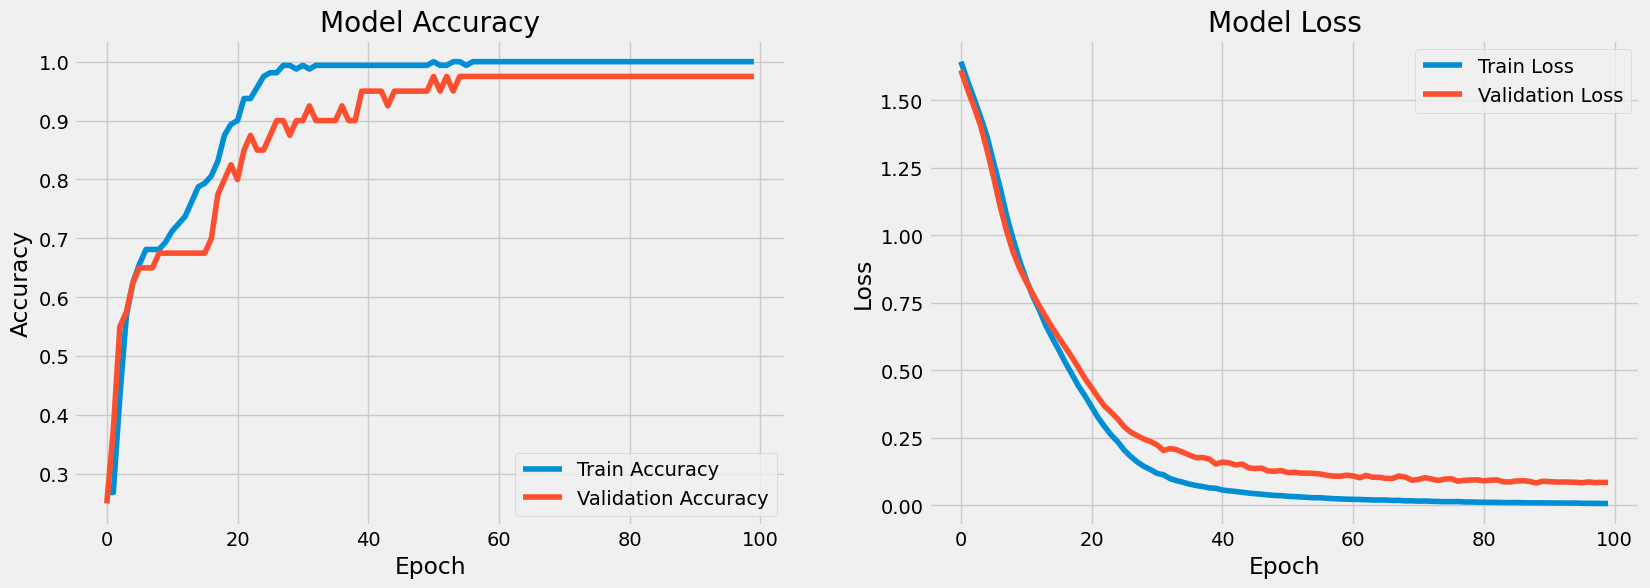

In [20]:
"""---

## 6. 모델링 결과 시각화 및 평가

학습된 모델의 성능을 시각적으로 확인하고, 다양한 평가지표를 통해 정량적으로 분석합니다.

### 6-1. 학습 손실 및 정확도 시각화
"""

# 학습 과정(Accuracy, Loss) 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Accuracy 그래프
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss 그래프
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step


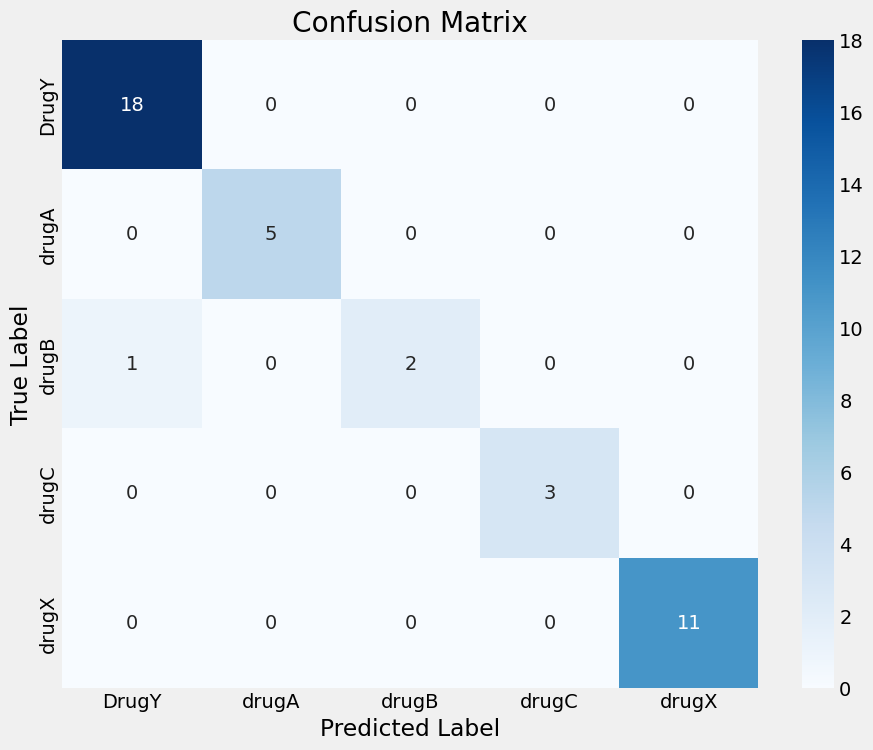


### Classification Report ###
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40


Final Test Accuracy: 0.9750


In [21]:
"""### 6-2. 평가지표 분석"""

# 테스트 데이터에 대한 예측 수행
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report 출력
print("\n### Classification Report ###")
print(classification_report(y_test_labels, y_pred, target_names=le.classes_))

# 최종 정확도 출력
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"\nFinal Test Accuracy: {accuracy:.4f}")